---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Blood Transfusion Model

First, run the following block to set up the variables needed for later sections.

## Setting the working environment 

In [59]:
import os
path= 'E:/Shahid/Projects/Dengue Project/Python_Dengue_Project/BTDone/Code'
os.chdir(path)

In [60]:
import platform
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
#from imblearn.over_sampling import SMOTE
#from tabulate import tabulate
import itertools
import seaborn as sns
from copy import copy
from sklearn.externals import joblib
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer, RobustScaler
import sklearn
from sklearn.externals import joblib
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Normalizer, FunctionTransformer
from sklearn.kernel_approximation import Nystroem
from sklearn.model_selection import train_test_split
#import sklearn.model_selection.StratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, r2_score
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
# notice: installing imblearn might takes a few minutes
!conda install -c anaconda imblearn -y

Solving environment: ...working... failed



PackagesNotFoundError: The following packages are not available from current channels:

  - imblearn

Current channels:

  - https://conda.anaconda.org/anaconda/win-64
  - https://conda.anaconda.org/anaconda/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/win-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/pro/win-64
  - https://repo.anaconda.com/pkgs/pro/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [ ]:
# notice: installing tabulate might takes a few minutes
!conda install -c anaconda tabulate -y

### 1. The LoadData routiine is used to read dataset, and create training and testing datasets

In [61]:
def LoadData():
    global feature_names, response_name, n_features, model_full  
    pth ='isBTDoneAtAdmission2.csv'
    model_full = pd.read_csv(pth)
    response_name = ['isBTDone']
    
    # Features for linear model
    # No of columns = 380
    #feature_names =['AgeGrp','isAge_01_20','isAge_20_40','isAge_40_60','isAgeGt60','Gender','maritalStatusWithoutFamily','maritalStatusWithFamily','maritalStatusUnknown','isResCity','admissionTypeER','admissionTypeDirect','isPrvsAdmn','isChannelCorporate','isChannelCashCd','isChannelPSU','isChannelTPA','isAssistedVentilation','AlbuminFirstH','AlbuminFirstL','AlbuminFirstN','SGPT_ALTFirstH','SGPT_ALTFirstL','SGPT_ALTFirstN','SGOT_ASTFirstH','SGOT_ASTFirstL','SGOT_ASTFirstN','bilirubinDirectFirstH','bilirubinDirectFirstL','bilirubinDirectFirstN','bilirubinIndirectFirstH','bilirubinIndirectFirstL','bilirubinIndirectFirstN','bilirubinTotalFirstH','bilirubinTotalFirstL','bilirubinTotalFirstN','CreatinineFirstH','CreatinineFirstL','CreatinineFirstN','EosinophilsFirstH','EosinophilsFirstL','EosinophilsFirstN','GlobulinFirstH','GlobulinFirstL','GlobulinFirstN','HaematocritFirstH','HaematocritFirstL','HaematocritFirstN','HaemoglobinFirstH','HaemoglobinFirstL','HaemoglobinFirstN','LymphocytesFirstH','LymphocytesFirstL','LymphocytesFirstN','MCHCFirstH','MCHCFirstL','MCHCFirstN','MCHFirstH','MCHFirstL','MCHFirstN','MCVFirstH','MCVFirstL','MCVFirstN','MonocytesFirstH','MonocytesFirstL','MonocytesFirstN','NeutrophilsFirstH','NeutrophilsFirstL','NeutrophilsFirstN','PotassiumFirstH','PotassiumFirstL','PotassiumFirstN','rbcCountFirstH','rbcCountFirstL','rbcCountFirstN','RDWFirstH','RDWFirstL','RDWFirstN','SodiumFirstH','SodiumFirstL','SodiumFirstN','TLCFirstH','TLCFirstL','TLCFirstN','TotalProteinFirstH','TotalProteinFirstL','TotalProteinFirstN','AlbuminMinH','AlbuminMinL','AlbuminMinN','SGPT_ALTMinH','SGPT_ALTMinL','SGPT_ALTMinN','SGOT_ASTMinH','SGOT_ASTMinL','SGOT_ASTMinN','bilirubinDirectMinH','bilirubinDirectMinL','bilirubinDirectMinN','bilirubinIndirectMinH','bilirubinIndirectMinL','bilirubinIndirectMinN','bilirubinTotalMinH','bilirubinTotalMinL','bilirubinTotalMinN','CreatinineMinH','CreatinineMinL','CreatinineMinN','EosinophilsMinH','EosinophilsMinL','EosinophilsMinN','GlobulinMinH','GlobulinMinL','GlobulinMinN','HaematocritMinH','HaematocritMinL','HaematocritMinN','HaemoglobinMinH','HaemoglobinMinL','HaemoglobinMinN','LymphocytesMinH','LymphocytesMinL','LymphocytesMinN','MCHCMinH','MCHCMinL','MCHCMinN','MCHMinH','MCHMinL','MCHMinN','MCVMinH','MCVMinL','MCVMinN','MonocytesMinH','MonocytesMinL','MonocytesMinN','NeutrophilsMinH','NeutrophilsMinL','NeutrophilsMinN','PotassiumMinH','PotassiumMinL','PotassiumMinN','rbcCountMinH','rbcCountMinL','rbcCountMinN','RDWMinH','RDWMinL','RDWMinN','SodiumMinH','SodiumMinL','SodiumMinN','TLCMinH','TLCMinL','TLCMinN','TotalProteinMinH','TotalProteinMinL','TotalProteinMinN','AlbuminMaxH','AlbuminMaxL','AlbuminMaxN','SGPT_ALTMaxH','SGPT_ALTMaxL','SGPT_ALTMaxN','SGOT_ASTMaxH','SGOT_ASTMaxL','SGOT_ASTMaxN','bilirubinDirectMaxH','bilirubinDirectMaxL','bilirubinDirectMaxN','bilirubinIndirectMaxH','bilirubinIndirectMaxL','bilirubinIndirectMaxN','bilirubinTotalMaxH','bilirubinTotalMaxL','bilirubinTotalMaxN','CreatinineMaxH','CreatinineMaxL','CreatinineMaxN','EosinophilsMaxH','EosinophilsMaxL','EosinophilsMaxN','GlobulinMaxH','GlobulinMaxL','GlobulinMaxN','HaematocritMaxH','HaematocritMaxL','HaematocritMaxN','HaemoglobinMaxH','HaemoglobinMaxL','HaemoglobinMaxN','LymphocytesMaxH','LymphocytesMaxL','LymphocytesMaxN','MCHCMaxH','MCHCMaxL','MCHCMaxN','MCHMaxH','MCHMaxL','MCHMaxN','MCVMaxH','MCVMaxL','MCVMaxN','MonocytesMaxH','MonocytesMaxL','MonocytesMaxN','NeutrophilsMaxH','NeutrophilsMaxL','NeutrophilsMaxN','PotassiumMaxH','PotassiumMaxL','PotassiumMaxN','rbcCountMaxH','rbcCountMaxL','rbcCountMaxN','RDWMaxH','RDWMaxL','RDWMaxN','SodiumMaxH','SodiumMaxL','SodiumMaxN','TLCMaxH','TLCMaxL','TLCMaxN','TotalProteinMaxH','TotalProteinMaxL','TotalProteinMaxN','AlbuminAvgH','AlbuminAvgL','AlbuminAvgN','SGPT_ALTAvgH','SGPT_ALTAvgL','SGPT_ALTAvgN','SGOT_ASTAvgH','SGOT_ASTAvgL','SGOT_ASTAvgN','bilirubinDirectAvgH','bilirubinDirectAvgL','bilirubinDirectAvgN','bilirubinIndirectAvgH','bilirubinIndirectAvgL','bilirubinIndirectAvgN','bilirubinTotalAvgH','bilirubinTotalAvgL','bilirubinTotalAvgN','CreatinineAvgH','CreatinineAvgL','CreatinineAvgN','EosinophilsAvgH','EosinophilsAvgL','EosinophilsAvgN','GlobulinAvgH','GlobulinAvgL','GlobulinAvgN','HaematocritAvgH','HaematocritAvgL','HaematocritAvgN','HaemoglobinAvgH','HaemoglobinAvgL','HaemoglobinAvgN','LymphocytesAvgH','LymphocytesAvgL','LymphocytesAvgN','MCHCAvgH','MCHCAvgL','MCHCAvgN','MCHAvgH','MCHAvgL','MCHAvgN','MCVAvgH','MCVAvgL','MCVAvgN','MonocytesAvgH','MonocytesAvgL','MonocytesAvgN','NeutrophilsAvgH','NeutrophilsAvgL','NeutrophilsAvgN','PotassiumAvgH','PotassiumAvgL','PotassiumAvgN','rbcCountAvgH','rbcCountAvgL','rbcCountAvgN','RDWAvgH','RDWAvgL','RDWAvgN','SodiumAvgH','SodiumAvgL','SodiumAvgN','TLCAvgH','TLCAvgL','TLCAvgN','TotalProteinAvgH','TotalProteinAvgL','TotalProteinAvgN','AlbuminLastH','AlbuminLastL','AlbuminLastN','SGPT_ALTLastH','SGPT_ALTLastL','SGPT_ALTLastN','SGOT_ASTLastH','SGOT_ASTLastL','SGOT_ASTLastN','bilirubinDirectLastH','bilirubinDirectLastL','bilirubinDirectLastN','bilirubinIndirectLastH','bilirubinIndirectLastL','bilirubinIndirectLastN','bilirubinTotalLastH','bilirubinTotalLastL','bilirubinTotalLastN','CreatinineLastH','CreatinineLastL','CreatinineLastN','EosinophilsLastH','EosinophilsLastL','EosinophilsLastN','GlobulinLastH','GlobulinLastL','GlobulinLastN','HaematocritLastH','HaematocritLastL','HaematocritLastN','HaemoglobinLastH','HaemoglobinLastL','HaemoglobinLastN','LymphocytesLastH','LymphocytesLastL','LymphocytesLastN','MCHCLastH','MCHCLastL','MCHCLastN','MCHLastH','MCHLastL','MCHLastN','MCVLastH','MCVLastL','MCVLastN','MonocytesLastH','MonocytesLastL','MonocytesLastN','NeutrophilsLastH','NeutrophilsLastL','NeutrophilsLastN','PotassiumLastH','PotassiumLastL','PotassiumLastN','rbcCountLastH','rbcCountLastL','rbcCountLastN','RDWLastH','RDWLastL','RDWLastN','SodiumLastH','SodiumLastL','SodiumLastN','TLCLastH','TLCLastL','TLCLastN','TotalProteinLastH','TotalProteinLastL','TotalProteinLastN','thoromboCytopeniaFirstSevere','thoromboCytopeniaFirstModerate','thoromboCytopeniaFirstMild','noThoromboCytopeniaFirst','thoromboCytopeniaMinSevere','thoromboCytopeniaMinModerate','thoromboCytopeniaMinMild','noThoromboCytopeniaMin','thoromboCytopeniaMaxSevere','thoromboCytopeniaMaxModerate','thoromboCytopeniaMaxMild','noThoromboCytopeniaMax','thoromboCytopeniaAvgSevere','thoromboCytopeniaAvgModerate','thoromboCytopeniaAvgxMild','noThoromboCytopeniaAvg','thoromboCytopeniaLastSevere','thoromboCytopeniaLastModerate','thoromboCytopeniaLastxMild','noThoromboCytopeniaLast','Pleural_effusion','Left_effusion','Right_effusion','Bilateral_effusion','Abdominal_free_fluid']
    
    # Features for non-linear model
    # No of columns = 61
    feature_names = ['Gender','maritalStatusWithoutFamily','maritalStatusWithFamily','maritalStatusUnknown','isResCity','admissionTypeER','admissionTypeDirect','isPrvsAdmn','isChannelCorporate','isChannelCashCd','isChannelPSU','isChannelTPA','isAssistedVentilation','thoromboCytopeniaFirstSevere','thoromboCytopeniaFirstModerate','thoromboCytopeniaFirstMild','noThoromboCytopeniaFirst','thoromboCytopeniaMinSevere','thoromboCytopeniaMinModerate','thoromboCytopeniaMinMild','noThoromboCytopeniaMin','thoromboCytopeniaMaxSevere','thoromboCytopeniaMaxModerate','thoromboCytopeniaMaxMild','noThoromboCytopeniaMax','thoromboCytopeniaAvgSevere','thoromboCytopeniaAvgModerate','thoromboCytopeniaAvgxMild','noThoromboCytopeniaAvg','Pleural_effusion','Left_effusion','Right_effusion','Bilateral_effusion','Abdominal_free_fluid','AlbuminAtAdm','CreatinineAtAdm','EosinophilsAtAdm','GlobulinAtAdm','HaemoglobinAtAdm','LymphocytesAtAdm','MCHAtAdm','MCHCAtAdm','MCVAtAdm','MonocytesAtAdm','NeutrophilsAtAdm','PlateletCountAtAdm','PotassiumAtAdm','RBC.CountAtAdm','RDWAtAdm','SodiumAtAdm','TotalProteinAtAdm','bilirubinDirectAtAdm','bilirubinIndirectAtAdm','bilirubinTotalAtAdm','gammaGlutamylTransferaseAtAdm','HaematocritAtAdm','SGOT_ASTAtAdm','SGPT_ALTAtAdm','TLCAtAdm','Age'] 
    # Data Type 1
    #feature_names = ['EosinophilsMinN','HaematocritMaxL','HaemoglobinAvgN','HaemoglobinLastL','LymphocytesAvgH','LymphocytesFirstN','LymphocytesLastH','LymphocytesMaxH','LymphocytesMinH','LymphocytesMinL','MCHCMaxN','MonocytesFirstN','MonocytesMinN','PotassiumAvgN','PotassiumMinN','RDWAvgH','RDWMinN','SGOT_ASTFirstH','SGOT_ASTMaxH','admissionTypeDirect','bilirubinDirectAvgN','bilirubinDirectLastN','bilirubinIndirectLastN','bilirubinIndirectMinN','bilirubinTotalFirstH','isBTDone','isResCity','maritalStatusWithFamily','maritalStatusWithoutFamily']
    # Data type 2 -63 vars
    #feature_names = ['Gender','maritalStatusWithoutFamily','maritalStatusWithFamily','maritalStatusUnknown','isResCity','admissionTypeER','admissionTypeDirect','isPrvsAdmn','isChannelCorporate','isChannelCashCd','isChannelPSU','isChannelTPA','isAssistedVentilation','isBTDone','thoromboCytopeniaFirstSevere','thoromboCytopeniaFirstModerate','thoromboCytopeniaFirstMild','noThoromboCytopeniaFirst','thoromboCytopeniaMinSevere','thoromboCytopeniaMinModerate','thoromboCytopeniaMinMild','noThoromboCytopeniaMin','thoromboCytopeniaMaxSevere','thoromboCytopeniaMaxModerate','thoromboCytopeniaMaxMild','noThoromboCytopeniaMax','thoromboCytopeniaAvgSevere','thoromboCytopeniaAvgModerate','thoromboCytopeniaAvgxMild','noThoromboCytopeniaAvg','Pleural_effusion','Left_effusion','Right_effusion','Bilateral_effusion','Abdominal_free_fluid','AlbuminAtAdm','CreatinineAtAdm','EosinophilsAtAdm','GlobulinAtAdm','HaemoglobinAtAdm','LymphocytesAtAdm','MCHAtAdm','MCHCAtAdm','MCVAtAdm','MonocytesAtAdm','NeutrophilsAtAdm','PlateletCountAtAdm','PotassiumAtAdm','RBC.CountAtAdm','RDWAtAdm','SodiumAtAdm','TotalProteinAtAdm','bilirubinDirectAtAdm','bilirubinIndirectAtAdm','bilirubinTotalAtAdm','gammaGlutamylTransferaseAtAdm','HaematocritAtAdm','SGOT_ASTAtAdm','SGPT_ALTAtAdm','TLCAtAdm','Age']
    # Data type 1 : IV: 116 (64)
    #feature_names = ['admissionTypeDirect',	'admissionTypeER',	'CreatinineAvgH',	'CreatinineFirstH',	'CreatinineLastH',	'CreatinineMaxH',	'CreatinineMinH',	'EosinophilsAvgL',	'EosinophilsAvgN',	'EosinophilsFirstL',	'EosinophilsFirstN',	'EosinophilsLastL',	'EosinophilsLastN',	'EosinophilsMaxL',	'EosinophilsMaxN',	'EosinophilsMinL',	'EosinophilsMinN',	'GlobulinLastN',	'GlobulinMinN',	'HaematocritAvgL',	'HaematocritAvgN',	'HaematocritFirstL',	'HaematocritFirstN',	'HaematocritLastL',	'HaematocritLastN',	'HaematocritMaxL',	'HaematocritMaxN',	'HaematocritMinL',	'HaematocritMinN',	'HaemoglobinAvgL',	'HaemoglobinAvgN',	'HaemoglobinFirstL',	'HaemoglobinFirstN',	'HaemoglobinLastL',	'HaemoglobinLastN',	'HaemoglobinMaxL',	'HaemoglobinMaxN',	'HaemoglobinMinL',	'HaemoglobinMinN',	'isAssistedVentilation',	'isBTDone',	'isPrvsAdmn',	'LymphocytesAvgH',	'LymphocytesAvgL',	'LymphocytesFirstH',	'LymphocytesFirstL',	'LymphocytesLastH',	'LymphocytesLastL',	'LymphocytesLastN',	'LymphocytesMaxH',	'LymphocytesMaxL',	'LymphocytesMaxN',	'LymphocytesMinH',	'LymphocytesMinL',	'maritalStatusUnknown',	'maritalStatusWithoutFamily',	'MonocytesFirstL',	'NeutrophilsAvgH',	'NeutrophilsAvgL',	'NeutrophilsAvgN',	'NeutrophilsFirstH',	'NeutrophilsFirstN',	'NeutrophilsLastH',	'NeutrophilsLastN',	'NeutrophilsMaxH',	'NeutrophilsMaxL',	'NeutrophilsMaxN',	'NeutrophilsMinH',	'NeutrophilsMinN',	'noThoromboCytopeniaFirst',	'noThoromboCytopeniaLast',	'noThoromboCytopeniaMin',	'Pleural_effusion',	'rbcCountAvgL',	'rbcCountAvgN',	'rbcCountFirstL',	'rbcCountFirstN',	'rbcCountLastL',	'rbcCountLastN',	'rbcCountMaxL',	'rbcCountMaxN',	'rbcCountMinL',	'rbcCountMinN',	'RDWAvgH',	'RDWAvgN',	'RDWFirstH',	'RDWFirstN',	'RDWLastH',	'RDWLastN',	'RDWMaxH',	'RDWMaxN',	'RDWMinH',	'RDWMinN',	'Right_effusion',	'SGOT_ASTAvgH',	'SGOT_ASTAvgN',	'SGOT_ASTFirstH',	'SGOT_ASTFirstN',	'SGOT_ASTLastH',	'SGOT_ASTLastN',	'SGOT_ASTMaxH',	'SGOT_ASTMaxN',	'SGOT_ASTMinH',	'SGOT_ASTMinN',	'SGPT_ALTFirstL',	'SGPT_ALTMinH',	'SGPT_ALTMinL',	'SodiumMaxH',	'thoromboCytopeniaAvgxMild',	'thoromboCytopeniaFirstMild',	'thoromboCytopeniaLastxMild',	'thoromboCytopeniaMaxMild',	'thoromboCytopeniaMinMild',	'TLCAvgH',	'TLCFirstH',	'TLCMaxH']
    # # Data type 1 : Chi Square + Domain Knowledge =36
    #feature_names =['admissionTypeDirect',	'admissionTypeER',	'AlbuminAvgH',	'bilirubinIndirectFirstL',	'CreatinineMaxH',	'EosinophilsMinL',	'EosinophilsMinN',	'HaematocritFirstL',	'HaematocritFirstN',	'HaemoglobinMinL',	'HaemoglobinMinN',	'isAssistedVentilation',	'isBTDone',	'isPrvsAdmn',	'Left_effusion',	'LymphocytesMinH',	'LymphocytesMinL',	'maritalStatusUnknown',	'maritalStatusWithoutFamily',	'NeutrophilsAvgH',	'noThoromboCytopeniaFirst',	'Pleural_effusion',	'PotassiumMinL',	'rbcCountMinL',	'rbcCountMinN',	'RDWLastH',	'RDWLastN',	'Right_effusion',	'SGOT_ASTAvgH',	'SGOT_ASTAvgN',	'SGPT_ALTMinH',	'SGPT_ALTMinL',	'SodiumMaxH',	'thoromboCytopeniaFirstMild',	'TLCMaxH',	'TLCMaxN']
     # Data type 1 : All = 135
    #feature_names = ['admissionTypeDirect','admissionTypeER','AlbuminAvgH','AlbuminLastH',	'AlbuminMinH','bilirubinIndirectAvgL','bilirubinIndirectFirstL','bilirubinIndirectLastH','bilirubinIndirectLastL','bilirubinIndirectLastN','bilirubinIndirectMaxL','bilirubinIndirectMinL','CreatinineAvgH','CreatinineFirstH','CreatinineLastH','CreatinineMaxH','CreatinineMinH','EosinophilsAvgL','EosinophilsAvgN','EosinophilsFirstL','EosinophilsFirstN','EosinophilsLastL','EosinophilsLastN','EosinophilsMaxL','EosinophilsMaxN','EosinophilsMinN','GlobulinLastL','GlobulinMinL','GlobulinMinN','HaematocritAvgL','HaematocritAvgN','HaematocritFirstL','HaematocritFirstN',	'HaematocritLastL',	'HaematocritLastN',	'HaematocritMaxL',	'HaematocritMaxN',	'HaematocritMinL',	'HaematocritMinN',	'HaemoglobinAvgL',	'HaemoglobinAvgN',	'HaemoglobinFirstL',	'HaemoglobinFirstN',	'HaemoglobinLastL',	'HaemoglobinLastN',	'HaemoglobinMaxL',	'HaemoglobinMaxN',	'HaemoglobinMinL',	'HaemoglobinMinN',	'isAssistedVentilation',	'isBTDone',	'isPrvsAdmn',	'Left_effusion',	'LymphocytesAvgH',	'LymphocytesAvgL',	'LymphocytesAvgN',	'LymphocytesFirstH',	'LymphocytesFirstL',	'LymphocytesLastH',	'LymphocytesLastL',	'LymphocytesLastN',	'LymphocytesMaxH',	'LymphocytesMaxL',	'LymphocytesMaxN',	'LymphocytesMinH',	'LymphocytesMinL',	'maritalStatusUnknown',	'maritalStatusWithoutFamily',	'MonocytesFirstL',	'MonocytesFirstN',	'MonocytesMinL',	'NeutrophilsAvgH',	'NeutrophilsAvgL',	'NeutrophilsAvgN',	'NeutrophilsFirstH',	'NeutrophilsFirstN',	'NeutrophilsLastH',	'NeutrophilsLastN',	'NeutrophilsMaxH',	'NeutrophilsMaxL',	'NeutrophilsMaxN',	'NeutrophilsMinH',	'NeutrophilsMinN',	'noThoromboCytopeniaAvg',	'noThoromboCytopeniaFirst',	'noThoromboCytopeniaLast',	'noThoromboCytopeniaMin',	'Pleural_effusion',	'PotassiumMinL',	'rbcCountAvgL',	'rbcCountAvgN',	'rbcCountFirstL',	'rbcCountFirstN',	'rbcCountLastL',	'rbcCountLastN',	'rbcCountMaxL',	'rbcCountMaxN',	'rbcCountMinL',	'rbcCountMinN',	'RDWAvgH',	'RDWAvgN',	'RDWFirstH',	'RDWFirstN',	'RDWLastH',	'RDWLastN',	'RDWMaxH',	'RDWMaxN',	'RDWMinH',	'RDWMinN',	'Right_effusion',	'SGOT_ASTAvgH',	'SGOT_ASTAvgN',	'SGOT_ASTFirstH',	'SGOT_ASTFirstN',	'SGOT_ASTLastH',	'SGOT_ASTLastN',	'SGOT_ASTMaxH','SGOT_ASTMaxN','SGOT_ASTMinH','SGOT_ASTMinN','SGPT_ALTFirstL','SGPT_ALTMinH','SGPT_ALTMinL','SodiumMaxH','thoromboCytopeniaAvgxMild','thoromboCytopeniaFirstMild','thoromboCytopeniaLastSevere','thoromboCytopeniaLastxMild','thoromboCytopeniaMaxMild','thoromboCytopeniaMinMild','TLCAvgH','TLCFirstH','TLCMaxH','TLCMaxN','TLCMinH']
    # Feature Selection
    
    # 1. Feature selection with correlation
    
    # 2. Univariate feature selection SelectKBest, chi2
    
    # 3. Recursive feature elimination (RFE) with random forest
    
    # 4. Recursive feature elimination with cross validation(RFECV) with random forest
    
    # 5. Tree based feature selection with random forest classification
    
    # 6. ExtraTree based feature selection 
    
    # 7. L1 feature selection (LinearSVC)
    
    # 8. Vote based feature selection
    
    n_features = len(feature_names)
    mask = feature_names + response_name

    model_data = model_full[mask]
    #print('Model dataset:\n', model_data.head(5))
    # print('\nDescription of model dataset:\n', model_data[feature_names].describe(include='all'))

    # Correlation_plot(model)

    X = model_data[feature_names].values
    y = model_data[response_name].values.ravel()
    
    #--------------------------------------------------------------------------------
    #Synthetic Minority Oversampling Technique

    #sm = SMOTE(random_state=12)
    #X_resampled, y_resampled = sm.fit_sample(X, y)

#    X_train, X_test, y_train, y_test = train_test_split(X_resampled,
#                                                        y_resampled,
#                                                        test_size = 0.30,
#                                                        random_state = 1234)
    #----------------------------------------------------------------------------------
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size = 0.3,
                                                        random_state = 12345)
    #print('Size of resampled data:')
    #print(' train shape... ', X_train.shape, y_train.shape)
    #print(' test shape.... ', X_test.shape, y_test.shape)

    #return X_train, y_train, X_test, y_test, X_resampled, y_resampled
    return X_train, y_train, X_test, y_test

In [11]:
X_train, y_train, X_test, y_test = LoadData()

In [12]:
print('Size of data:')
print ('The train data has {0} rows and {1} columns'.format(X_train.shape[0],X_train.shape[1]))
print ('----------------------------')
print ('The test data has {0} rows and {1} columns'.format(X_test.shape[0],X_test.shape[1]))

Size of data:
The train data has 803 rows and 60 columns
----------------------------
The test data has 345 rows and 60 columns


###  Plot the ROC_Curve and Precision-Recall curve. 

In [13]:
def Plot_ROC_Precision_Recall():
    class_names = [0, 1]
    fig, (left, right) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange', label='Random Forest')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve (area = %0.7f)' % auc)
    plt.legend(loc='best')

    plt.subplot(1, 2, 2)
    precision, recall, _ = precision_recall_curve(y_test, y_probabilities_success)

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

    plt.tight_layout()
    plt.show()

### This routine is used to plot the predictor (a.k.a feature) importances. 

In [14]:
def Plot_Predictor_Importance(logisticRegression = True):
    if(logisticRegression):
        feature_importance = best_model.feature_importances_
        feature_importance = 100.0 * (feature_importance / feature_importance.max())
        sorted_idx = np.argsort(feature_importance)
        y_pos = np.arange(sorted_idx.shape[0]) + .5
        fig, ax = plt.subplots()
        fig.set_size_inches(8, 5)
        ax.barh(y_pos, feature_importance[sorted_idx], align='center', color='green', ecolor='black', height=0.5)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(feature_names)
        ax.invert_yaxis()
        ax.set_xlabel('Relative Importance')
        ax.set_title('Predictor Importance')
        plt.show()

### This routine is used to summarize the metrics for the model.

In [15]:
def Print_Model_Metrics():
    true_negative  = cm[0, 0]
    true_positive  = cm[1, 1]
    false_negative = cm[1, 0]
    false_positive = cm[0, 1]
    total = true_negative + true_positive + false_negative + false_positive

    accuracy_ = (true_positive + true_negative)/total
    precision_ = (true_positive)/(true_positive + false_positive)
    recall_ = (true_positive)/(true_positive + false_negative)
    misclassification_rate = (false_positive + false_negative)/total
    F1_ = (2*true_positive)/(2*true_positive + false_positive + false_negative)
    assert accuracy == accuracy_, "accuracy score does not agree"
    assert precision == precision_, "precision score does not agree"
    assert recall == recall_, "recall score does not agree"
    assert round(F1,6) == round(F1_,6), "F1: " + str(F1) + " != F1_: " + str(F1_)

    header = ["Metric", "Test"]
    table = [["accuracy",               accuracy],
             ["precision",              precision],
             ["recall",                 recall],
             ["misclassification rate", misclassification_rate],
             ["F1",                     F1],
             ["r2",                     r2],
             ["AUC",                    auc],
             ["mse",                    mse],
             ["logloss",                logloss]
            ]

    print(tabulate(table, header, tablefmt="fancy_grid"))

### This routine plots the confusion matrix. 

In [16]:
def Plot_Confusion_Matrix():
    cmap = plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    title='Confusion matrix (on test data)'
    classes = [0, 1]
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    c_report = classification_report(y_test, y_predicted_test)
    print('\nClassification report:\n', c_report)

    ntotal = len(y_test)
    correct = y_test == y_predicted_test
    numCorrect = sum(correct)
    percent = round( (100.0*numCorrect)/ntotal, 6)
    print("\nCorrect classifications on test data: {0:d}/{1:d} {2:8.3f}%".format(numCorrect,
                                                                                 ntotal,
                                                                                 percent))
    prediction_score = 100.0*best_model.score(X_test, y_test)
    assert (round(percent,3) == round(prediction_score, 3)), "prediction score does not agree"

In [17]:
def dataPreProc():
    X_train, y_train, X_test, y_test = LoadData()
    seed = 7
    np.random.seed(seed)
    # scaling data
    scale = StandardScaler()
    X_tr = scale.fit_transform(X_train)
    X_te = scale.fit_transform(X_test)
    return X_tr, X_te

In [18]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [19]:
def best_mdl():
    print('\n Best estimator:')
    print(model.best_estimator_)
    print('\n Best score:')
    print(model.best_score_ * 2 - 1)
    print('\n Best parameters:')
    print(model.best_params_)
    results = pd.DataFrame(model.cv_results_)
    print('\n CV results:')
    print(results.head())
    best_model = model_result.best_estimator_
    return best_model

### Exploratory Data Analysis

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
X_train, y_train, X_test, y_test = LoadData()
model_full.head()

,RegistrationNo,Gender,maritalStatusWithoutFamily,maritalStatusWithFamily,maritalStatusUnknown,isResCity,admissionTypeER,admissionTypeDirect,isPrvsAdmn,isChannelCorporate,...,TotalProteinAtAdm,bilirubinDirectAtAdm,bilirubinIndirectAtAdm,bilirubinTotalAtAdm,gammaGlutamylTransferaseAtAdm,HaematocritAtAdm,SGOT_ASTAtAdm,SGPT_ALTAtAdm,TLCAtAdm,Age
0,241,1,0,1,0,1,1,0,1,0,...,5.36,0.29,0.38,0.67,57.0,58.9,52.3,31.0,5.9,76
1,693,0,1,0,0,1,0,1,0,0,...,6.50,0.20,0.40,0.60,61.0,34.6,106.0,66.0,4.3,15
2,709,1,0,1,0,1,1,0,1,0,...,6.50,0.20,0.40,0.60,61.0,36.4,106.0,66.0,16.5,68
3,842,0,0,1,0,1,0,1,0,0,...,6.90,0.10,0.70,0.80,76.0,18.9,37.0,23.0,2.0,62
4,886,0,0,0,1,1,1,0,1,0,...,6.50,0.20,0.40,0.60,61.0,40.4,106.0,66.0,5.0,41


In [22]:
model_full.describe()

,RegistrationNo,Gender,maritalStatusWithoutFamily,maritalStatusWithFamily,maritalStatusUnknown,isResCity,admissionTypeER,admissionTypeDirect,isPrvsAdmn,isChannelCorporate,...,TotalProteinAtAdm,bilirubinDirectAtAdm,bilirubinIndirectAtAdm,bilirubinTotalAtAdm,gammaGlutamylTransferaseAtAdm,HaematocritAtAdm,SGOT_ASTAtAdm,SGPT_ALTAtAdm,TLCAtAdm,Age
count,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,...,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000
mean,239556.583624,0.602787,0.439024,0.533101,0.027875,0.980836,0.699477,0.300523,0.171603,0.021777,...,6.481045,0.250697,0.482744,0.735096,84.268293,40.570470,209.819599,113.177700,5.943876,30.342334
std,166630.101091,0.489534,0.496484,0.499121,0.164685,0.137160,0.458685,0.458685,0.377199,0.146018,...,0.569192,0.437538,0.780370,1.022830,90.879366,5.889456,840.337939,308.932561,4.049610,18.326033
min,241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.900000,0.000000,0.100000,0.100000,4.000000,18.900000,13.000000,8.000000,0.900000,0.000000
25%,88861.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,6.400000,0.200000,0.400000,0.500000,57.750000,36.800000,85.000000,47.750000,3.700000,16.000000
50%,291616.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,6.500000,0.200000,0.400000,0.600000,61.000000,40.400000,106.000000,66.000000,5.000000,28.000000
75%,358537.750000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,6.600000,0.200000,0.400000,0.600000,67.000000,44.300000,135.000000,88.000000,6.800000,41.250000
max,688877.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,8.500000,7.000000,16.600000,17.100000,1029.000000,58.900000,18590.000000,6054.000000,45.400000,87.000000


In [23]:
model_full.dtypes

RegistrationNo                      int64
Gender                              int64
maritalStatusWithoutFamily          int64
maritalStatusWithFamily             int64
maritalStatusUnknown                int64
isResCity                           int64
admissionTypeER                     int64
admissionTypeDirect                 int64
isPrvsAdmn                          int64
isChannelCorporate                  int64
isChannelCashCd                     int64
isChannelPSU                        int64
isChannelTPA                        int64
isAssistedVentilation               int64
isBTDone                            int64
thoromboCytopeniaFirstSevere        int64
thoromboCytopeniaFirstModerate      int64
thoromboCytopeniaFirstMild          int64
noThoromboCytopeniaFirst            int64
thoromboCytopeniaMinSevere          int64
thoromboCytopeniaMinModerate        int64
thoromboCytopeniaMinMild            int64
noThoromboCytopeniaMin              int64
thoromboCytopeniaMaxSevere        

Distribution of Blood transfusion on whole data


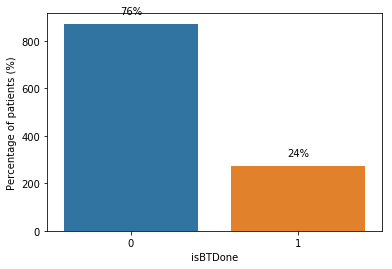

In [24]:
# lets get the % of Blood Transfusion patients
print('Distribution of Blood transfusion on whole data')
ax = sns.countplot(model_full['isBTDone'])
ax.set_ylabel('Percentage of patients (%)')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

In [26]:
no, yes = model_full['isBTDone'].value_counts()
X_train, y_train, X_test, y_test = LoadData()
print('Distribution of the data:')
print ('----------------------------------------------------')
print ('The total data has {0} rows and {1} columns'.format(model_full.shape[0],model_full.shape[1]))
print ('')
print ('Blood transfusion = yes cases = {0}  and % = {1} '.format(yes,np.round((yes/model_full.shape[0])*100,2)))
print ('')
print ('Blood transfusion = no cases = {0}  and % = {1} '.format(no,np.round((no/model_full.shape[0])*100,2)))
print ('')
print ('----------------------------------------------------')
print ('Distribution of training data')
print ('----------------------------------------------------')
print ('The train data has {0} rows and {1} columns'.format(X_train.shape[0],X_train.shape[1]))
print ('')
print ('The training data % = {0} '.format(np.round((X_train.shape[0]/model_full.shape[0])*100,2)))
print ('')
y_tr = y_train.sum()
n_tr = X_train.shape[0] -y_tr    #yes1
print ('Blood transfusion = yes cases = {0}  and % = {1} '.format(y_tr,np.round((y_tr/X_train.shape[0])*100,2)))
print ('')
print ('Blood transfusion = no cases = {0}  and % = {1} '.format(n_tr,np.round((n_tr/X_train.shape[0])*100,2)))
print ('')
print ('----------------------------------------------------')
print ('Distribution of testing data')
print ('----------------------------------------------------')
print ('The test data has {0} rows and {1} columns'.format(X_test.shape[0],X_test.shape[1]))
print ('')
print ('The testing data % = {0} '.format(np.round((X_test.shape[0]/model_full.shape[0])*100,2)))
print ('')
y_te = y_test.sum()
n_te = X_test.shape[0] -y_te
print ('Blood transfusion = yes cases = {0}  and % = {1} '.format(y_te,np.round((y_te/X_test.shape[0])*100,2)))
print ('')
print ('Blood transfusion = no cases = {0}  and % = {1} '.format(n_te,np.round((n_te/X_test.shape[0])*100,2)))

Distribution of the data:
----------------------------------------------------
The total data has 1148 rows and 62 columns

Blood transfusion = yes cases = 275  and % = 23.95 

Blood transfusion = no cases = 873  and % = 76.05 

----------------------------------------------------
Distribution of training data
----------------------------------------------------
The train data has 803 rows and 60 columns

The training data % = 69.95 

Blood transfusion = yes cases = 189  and % = 23.54 

Blood transfusion = no cases = 614  and % = 76.46 

----------------------------------------------------
Distribution of testing data
----------------------------------------------------
The test data has 345 rows and 60 columns

The testing data % = 30.05 

Blood transfusion = yes cases = 86  and % = 24.93 

Blood transfusion = no cases = 259  and % = 75.07 


Training data : Distribution of Blood transfusion


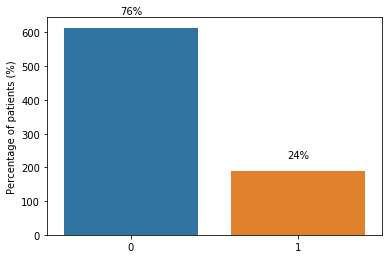

In [27]:
# lets get the % of Blood Transfusion patients
print('Training data : Distribution of Blood transfusion')
ax = sns.countplot(y_train)
ax.set_ylabel('Percentage of patients (%)')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

Testing data : Distribution of Blood transfusion


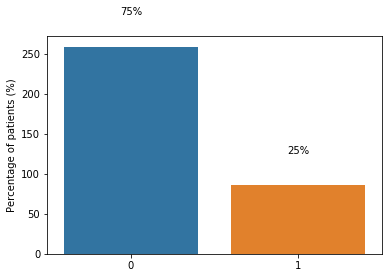

In [28]:
# lets get the % of Blood Transfusion patients
print('Testing data : Distribution of Blood transfusion')
ax = sns.countplot(y_test)
ax.set_ylabel('Percentage of patients (%)')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

### Define basic linear classifiers

In [54]:
lr_clf_dict = dict()

from sklearn.linear_model import Ridge
clf = Ridge()
lr_clf_dict['Ridge'] = clf

from sklearn.linear_model import Lasso
clf = Lasso()
lr_clf_dict['Lasso'] = clf

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear')
lr_clf_dict['Logistic Regression'] = clf

# 1
from sklearn.linear_model import ElasticNet
clf = ElasticNet()
lr_clf_dict['ElasticNet'] = clf

### Build models 

In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

folds = 5
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 10345)
# timing starts from this point for "start_time" variable
#start_time = timer(None)
for clf_name, clf in lr_clf_dict.items():
    scores = cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv=skf,verbose=1, n_jobs=1)
    print("---------------------------------------------------------------------") 
    print(clf_name)
    print("---------------------------------------------------------------------") 
    print ('CV mean: %.5f CV std: %.5f',np.mean(np.abs(scores)),np.std(scores))
    #auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    #print(clf_name, 'auc score:', auc)
#timer(start_time)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


---------------------------------------------------------------------
Ridge
---------------------------------------------------------------------
CV mean: %.5f CV std: %.5f 0.8392414300282731 0.04031320414981371


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


---------------------------------------------------------------------
Lasso
---------------------------------------------------------------------
CV mean: %.5f CV std: %.5f 0.5 0.0
---------------------------------------------------------------------
Logistic Regression
---------------------------------------------------------------------
CV mean: %.5f CV std: %.5f 0.8394626407379201 0.037953606064763855
---------------------------------------------------------------------
ElasticNet
---------------------------------------------------------------------
CV mean: %.5f CV std: %.5f 0.5 0.0


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


### Above outcome suggests Logistic Regression is best 

### Define basic non-linear classifiers

In [56]:
nonlr_clf_dict = dict()
# 2
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
nonlr_clf_dict['Random Forest Classifier'] = clf

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
nonlr_clf_dict['Gradient Boosting Classifier'] = clf

from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
nonlr_clf_dict['Extra Trees Classifier'] = clf

from xgboost import XGBClassifier
clf = XGBClassifier()
nonlr_clf_dict['XGB Classifier'] = clf

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
nonlr_clf_dict['KNeighbors Classifier'] = clf
# 3
from sklearn.svm import SVC
clf = SVC(kernel='rbf',probability=True)   # rbf, linear, polynomial, sigmoid 
nonlr_clf_dict['SVM Classifier'] = clf

In [50]:
X_train, X_test = dataPreProc()

In [51]:
X_train[1,]

array([-1.20650632,  1.08722823, -1.0290648 , -0.16783627,  0.14706631,
        0.66846604, -0.66846604, -0.44754771, -0.12316927, -0.11229577,
       -0.44754771,  0.49103241, -0.14706631, -0.23492667, -0.52209501,
       -0.52402593,  0.97904882, -0.30416608, -0.56440678, -0.52016307,
        1.12906489, -0.14706631, -0.49298484, -0.52209501,  0.88121999,
       -0.22287486, -0.52402593, -0.51823007,  0.95493705, -0.53174017,
       -0.31622777, -0.52016307, -0.29428476, -0.71173493,  1.7016017 ,
       -0.9632112 , -0.47142427, -1.04074853, -1.31764459, -1.14891101,
       -1.96010981, -1.06476217, -2.04391811,  1.48947872,  0.91986766,
        3.24511673,  1.50434158,  0.03690013,  0.78522867,  0.57960183,
        0.55518813, -0.33810221, -0.22551253, -0.31296492, -0.81348456,
       -1.15548659, -0.1916361 , -0.34825264,  0.30067341, -1.59475097])

### Build models 

In [57]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

folds = 5
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 10345)
# timing starts from this point for "start_time" variable
#start_time = timer(None)
for clf_name, clf in nonlr_clf_dict.items():
    scores = cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv=skf,verbose=1, n_jobs=1)
    print("---------------------------------------------------------------------") 
    print(clf_name)
    print("---------------------------------------------------------------------") 
    print("Cross Validation scores on training data")
    print ('CV mean: %.5f CV std: %.5f',np.mean(np.abs(scores)),np.std(scores))
    clf.fit(X_train, y_train)
    auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    print("")  
    print("AUC scores on testing data")       
    print(clf_name, 'auc score:', auc)
#timer(start_time)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


---------------------------------------------------------------------
Random Forest Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
CV mean: %.5f CV std: %.5f 0.8024446456599911 0.03675453991641758

AUC scores on testing data
Random Forest Classifier auc score: 0.8217877345784323


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


---------------------------------------------------------------------
Gradient Boosting Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
CV mean: %.5f CV std: %.5f 0.83857979804759 0.03943065936324342

AUC scores on testing data
Gradient Boosting Classifier auc score: 0.8598365807668134
---------------------------------------------------------------------
Extra Trees Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
CV mean: %.5f CV std: %.5f 0.8210675141986827 0.03994053037754128

AUC scores on testing data
Extra Trees Classifier auc score: 0.8550776690311575


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


---------------------------------------------------------------------
XGB Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
CV mean: %.5f CV std: %.5f 0.8423563149420176 0.029481474757346512

AUC scores on testing data
XGB Classifier auc score: 0.8534165394630511
---------------------------------------------------------------------
KNeighbors Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
CV mean: %.5f CV std: %.5f 0.7601260112360935 0.056271891354612025

AUC scores on testing data
KNeighbors Classifier auc score: 0.8127413127413127


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


---------------------------------------------------------------------
SVM Classifier
---------------------------------------------------------------------
Cross Validation scores on training data
CV mean: %.5f CV std: %.5f 0.8449959608380452 0.0207206317565092

AUC scores on testing data
SVM Classifier auc score: 0.8291505791505791


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


### Hyperparameter Optimization : GridSearch with Cross Validation for tuning parameters

### Logistic Regression : Hyperparameter Tuning and Visualization

In [125]:
# A parameter grid for Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
#class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  #class_weight=class_weight,
                  solver=solver)

In [127]:
model = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3)

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
model.fit(X_train, y_train)
#timer(start_time) # timing ends here for "start_time" variable
best_model = best_mdl()

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  40 tasks      | elapsed:    1.6s


Grid best score (AUC):  0.8437013818923059
Grid best parameter (max. AUC):  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:   25.6s finished
C:\Users\m019775\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### XGBoost : Hyperparameter Tuning and Visualization

In [188]:
# A parameter grid for XGBClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
clf = XGBClassifier()
# A parameter grid for XGBoost
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [189]:
model = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3)

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
model.fit(X_train, y_train)
#timer(start_time) # timing ends here for "start_time" variable
best_model = best_mdl()

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    8.3s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   19.1s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:   39.7s
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 1144 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 1560 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 2025 out of 2025 | elapsed:  4.6min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x000000000BA0AD68>,
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=3)

### Gradient Boosting Classifier : Hyperparameter Tuning and Visualization 

In [222]:
# A parameter grid for XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
# A parameter grid for GradientBoostingClassifier
param_grid = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

In [ ]:
model = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3)

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
model.fit(X_train, y_train)
#timer(start_time) # timing ends here for "start_time" variable
best_model = best_mdl()

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   11.5s


### Random Forest : Hyperparameter Tuning and Visualization 

In [ ]:
# A parameter grid for XGBClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import GradientBoostingClassifier
clf = RandomForestClassifier()
# A parameter grid for GradientBoostingClassifier
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
model = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3)

# Here we go
#start_time = timer(None) # timing starts from this point for "start_time" variable
model.fit(X_train, y_train)
#timer(start_time) # timing ends here for "start_time" variable
best_model = best_mdl()

### AUC, confusion matrix 

In [58]:
y_predicted_test  = best_model.predict(X_test)
y_probabilities_test = best_model.predict_proba(X_test)
y_probabilities_success = y_probabilities_test[:, 1]

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_probabilities_success)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_probabilities_success)

mse        = mean_squared_error(y_test, y_predicted_test)
logloss    = log_loss(y_test, y_predicted_test)
accuracy   = accuracy_score(y_test, y_predicted_test)
precision  = precision_score(y_test, y_predicted_test, average='binary')
recall     = recall_score(y_test, y_predicted_test, average='binary')
F1         = f1_score(y_test, y_predicted_test)
r2         = r2_score(y_test, y_predicted_test)
auc        = roc_auc_score(y_test, y_predicted_test)
cm         = confusion_matrix(y_test, y_predicted_test)

NameError: name 'best_model' is not defined


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=5, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.6)

 Best score:
0.7214080452209861

 Best parameters:
{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.6}

 CV results:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.380422      0.032514           0.0048        0.001721   
1       0.378822      0.020538           0.0036        0.000490   
2       0.374221      0.010323           0.0038        0.001166   
3       0.356821      0.006369           0.0034        0.000490   
4       0.368821      0.026166           0.0044        0.001855   

  param_colsample_bytree p

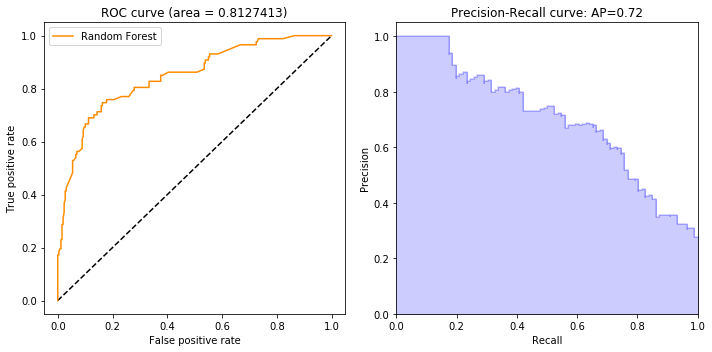


Classification report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89       259
           1       0.86      0.29      0.43        86

   micro avg       0.81      0.81      0.81       345
   macro avg       0.83      0.64      0.66       345
weighted avg       0.82      0.81      0.77       345


Correct classifications on test data: 280/345   81.159%


ValueError: X has 60 features per sample; expecting 388

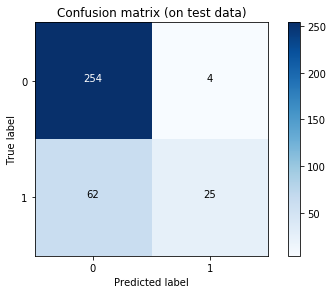

In [195]:
best_model = best_mdl()
Print_Model_Metrics()
Plot_ROC_Precision_Recall()
Plot_Confusion_Matrix()
Plot_Predictor_Importance(True)
#results_df = pd.DataFrame(data={'Observed':y_test, 'Predicted':y_predicted_test[:,1]})
#results_df.to_csv('grid-search--outcome.csv', index=False)